# ANIME RECOMMENDER SYSTEM - PREPROCESSING - ANIME - STEP 3

In [1]:
# basic library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
import collections
import pickle
import os
import cv2
import torch
from PIL import Image

## Preprocessing step:

1. scaling (numerical features)
2. encoding (categorical features)
3. word embedding
4. image embedding

### Image Embedding

step:
1. load all images from folder
2. preprocess image 
3. embed image

## load all images from folder & preprocess image 

test load

In [2]:
path = 'dataset/anime_img/'
path1 = 'dataset/anime_img'

In [3]:
test_img = cv2.imread(os.path.join(path1, 'anime_img_1.jpg'))

In [4]:
# check size
test_img = np.array(test_img)
print(test_img.shape)

(335, 225, 3)


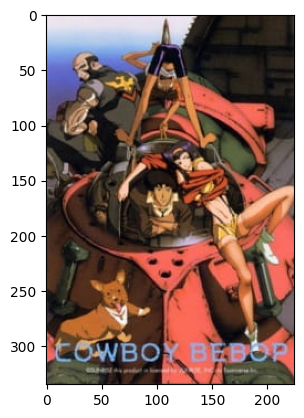

In [5]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

### load image from folder

set all image to same size (335, 225)

In [6]:
def load_img(dir):
    # list for images and corresponding anime_id
    images = []
    labels = []
    
    for name in os.listdir(dir):
        img = cv2.imread(os.path.join(dir, name))
        if img is not None: # check if the image is corrupted 
            img = cv2.resize(img, (225,335)) # resize image
            anime_id = name.replace('anime_img_', '').replace('.jpg', '')
            images.append(img)
            labels.append(anime_id)
        else:
            # print corrupted image name
            print(name)
            
    return images, labels

In [7]:
images, labels = load_img(path)

anime_img_40393.jpg
anime_img_41043.jpg
anime_img_47535.jpg
anime_img_48994.jpg
anime_img_53391.jpg
anime_img_53731.jpg


In [8]:
# images = np.array(images)
labels = np.array(labels)

# check size
# print(images.shape)
print(labels.shape)

(23759,)


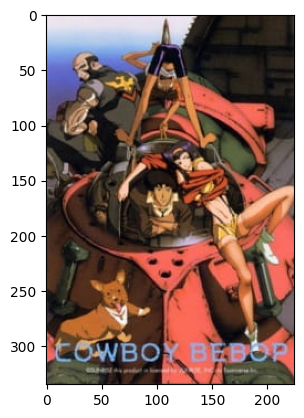

In [9]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

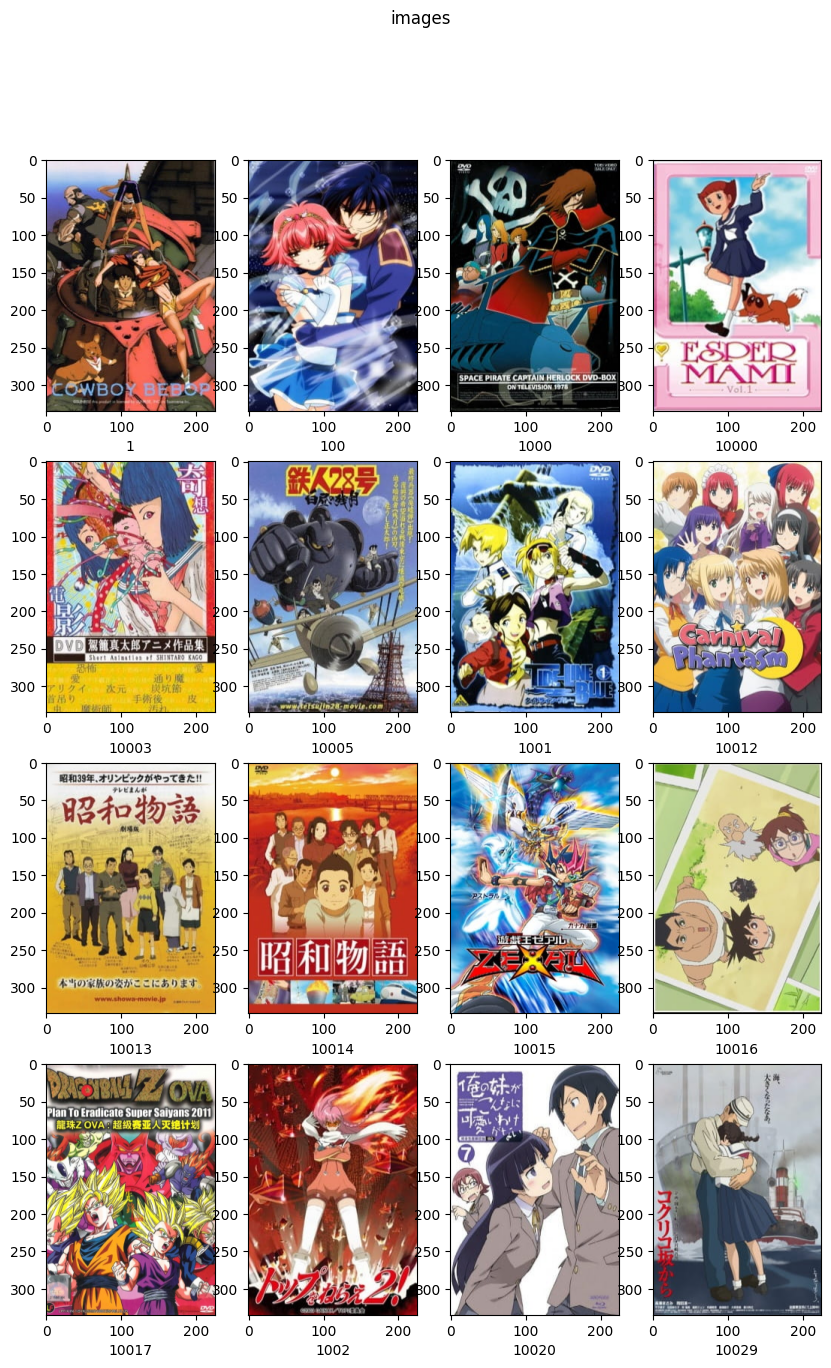

In [10]:
# view image data
plt.figure(figsize=(10,15))

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
  plt.xlabel(labels[i])

plt.suptitle('images')
plt.show()

## embed images

In [11]:
from img2vec_pytorch import Img2Vec

test embed

In [12]:
test_full_path = path + 'anime_img_1.jpg'

In [13]:
# # Initialize Img2Vec with GPU
img2vec = Img2Vec(cuda=False, layer_output_size = 100)

# # Read in an image (rgb format)
img = Image.open(test_full_path)
# # Get a vector from img2vec, returned as a torch FloatTensor
vec = img2vec.get_vec(img, tensor=True)
# # Or submit a list
# # vectors = img2vec.get_vec(list_of_PIL_images)

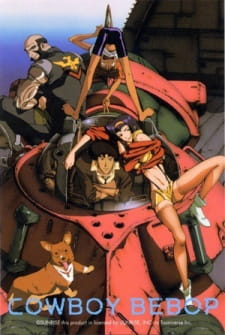

In [14]:
img

In [15]:
vec

tensor([[[[0.4772]],

         [[0.3678]],

         [[0.1556]],

         [[0.1213]],

         [[0.1729]],

         [[0.2722]],

         [[0.5997]],

         [[0.8471]],

         [[0.7831]],

         [[1.6677]],

         [[0.6412]],

         [[1.7865]],

         [[0.4777]],

         [[0.1147]],

         [[0.4754]],

         [[2.1779]],

         [[2.2512]],

         [[0.3255]],

         [[1.5194]],

         [[3.4878]],

         [[0.4535]],

         [[0.8807]],

         [[2.0014]],

         [[2.6205]],

         [[0.2895]],

         [[1.6444]],

         [[0.0839]],

         [[0.5225]],

         [[0.4848]],

         [[0.7188]],

         [[0.4372]],

         [[0.0996]],

         [[0.1492]],

         [[0.7631]],

         [[0.1792]],

         [[1.2251]],

         [[1.7349]],

         [[0.4232]],

         [[1.8604]],

         [[0.0473]],

         [[1.2044]],

         [[1.0886]],

         [[1.9219]],

         [[0.7062]],

         [[0.3107]],

         [

In [16]:
len(vec[0])

512

In [17]:
len(labels)

23759

divide images into batches to be embedded (computation limitation)

In [18]:
img_df = pd.DataFrame({'anime_id': labels, 'images': images})

In [19]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23759 entries, 0 to 23758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  23759 non-null  object
 1   images    23759 non-null  object
dtypes: object(2)
memory usage: 371.4+ KB


In [20]:
img_df.head()

,anime_id,images
0,1,"[[[247, 238, 248], [247, 238, 248], [246, 237,..."
1,100,"[[[141, 71, 58], [137, 69, 56], [142, 80, 62],..."
2,1000,"[[[18, 19, 17], [12, 13, 11], [15, 16, 14], [1..."
3,10000,"[[[193, 178, 169], [208, 197, 189], [183, 178,..."
4,10003,"[[[56, 60, 242], [56, 60, 239], [64, 62, 238],..."


In [21]:
def split_dataframe(df, chunk_size = 1000): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

In [22]:
chunks = split_dataframe(img_df)

In [23]:
for i, chunk in enumerate(chunks):
    chunk.to_csv('dataset/processed_dataset/preprocessing/img_batch/img_batch_' + str(i) + '.csv', index=False)
    chunk.to_pickle('./dataset/processed_dataset/preprocessing/img_batch/img_batch_' + str(i) + '.pkl')  
